In [2]:
import torch
import pygame

import numpy as np
import gymnasium as gym

pygame 2.1.0 (SDL 2.0.16, Python 3.10.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [10]:
# Run the code below to test the environment with keyboard input
env_name = "Taxi-v3"

actions = {
    pygame.K_DOWN: 0,    # move south
    pygame.K_UP: 1,      # move north
    pygame.K_RIGHT: 2,   # move east
    pygame.K_LEFT: 3,    # move west
    pygame.K_j: 4,       # pickup
    pygame.K_k: 5,       # dropoff
}

pygame.init()
env = gym.make(env_name, render_mode="human")

# Reset the environment with a seed
env.reset()

# Game loop
done = False
while not done:
    # Render the environment
    env.render()

    # Check for events (keyboard input)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:  # If the window close button is pressed
            done = True
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:  # If ESC is pressed
                done = True

    # Default action (no key pressed)
    action = -2

    # Check for key press and map it to action
    keys = pygame.key.get_pressed()
    for key, action_value in actions.items():
        if keys[key]:
            action = action_value
            break

    if action == -2:
        continue

    # Step through the environment with the chosen action
    observation, reward, terminated, truncated, info = env.step(action)

    # Check if the episode is over
    if terminated or truncated:
        observation, info = env.reset()

# Close the environment after the game loop
env.close()
pygame.quit()


In [11]:
class ReplayBuffer:
    def __init__(self, capacity):
        NotImplemented

    def add(self, state, action, reward, next_state, done):
        NotImplemented

    def sample(self, batch_size):
        NotImplemented

class QNet(torch.nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNet, self).__init__()
        NotImplemented

    def forward(self, x):
        NotImplemented

class DQN:
    def __init__(self, states, actions, device):
        self.device = device
        self.action = actions
        self.q_net = QNet(states, actions).to(device)
        self.target_q_net = QNet(states, actions).to(device)
        NotImplemented

    def take_action(self, state):
        NotImplemented

    def update(self):
        NotImplemented

In [12]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

env = gym.make(env_name, render_mode="rgb_array")

obs_space = env.observation_space.n   # 500, discrete
action_space = env.action_space.n   # 6, discrete

# The observation_space of Taxi-v3 is Discrete(500), meaning that each state is represented by an integer.
# When using DQN, this integer needs to be converted into a form suitable for neural network processing. (One-hot encoding)

def one_hot(state, state_size):
    vec = np.zeros(state_size)
    vec[state] = 1
    return vec

state, _ = env.reset()

episodes = 500
batch_size = 32
buffer_size = 128
min_buffer_size = 64

replay_buffer = ReplayBuffer(buffer_size)
agent = DQN(obs_space, action_space, device)

# Training Code Below


Iteration 0: 100%|████████████████████████████████████████████████| 100/100 [01:16<00:00,  1.31it/s]


Episode: 100, Average Return: -1359.41


Iteration 1: 100%|████████████████████████████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


Episode: 200, Average Return: -1112.01


Iteration 2: 100%|████████████████████████████████████████████████| 100/100 [01:16<00:00,  1.31it/s]


Episode: 300, Average Return: -757.60


Iteration 3: 100%|████████████████████████████████████████████████| 100/100 [00:50<00:00,  1.97it/s]


Episode: 400, Average Return: -451.59


Iteration 4: 100%|████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.26it/s]


Episode: 500, Average Return: -201.42


Iteration 5: 100%|████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.78it/s]


Episode: 600, Average Return: -89.65


Iteration 6: 100%|████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.40it/s]


Episode: 700, Average Return: -59.51


Iteration 7: 100%|████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.70it/s]


Episode: 800, Average Return: -23.55


Iteration 8: 100%|████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


Episode: 900, Average Return: -7.50


Iteration 9: 100%|████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.87it/s]


Episode: 1000, Average Return: -5.92


Iteration 10: 100%|███████████████████████████████████████████████| 100/100 [00:12<00:00,  8.03it/s]


Episode: 1100, Average Return: 8.38


Iteration 11: 100%|███████████████████████████████████████████████| 100/100 [00:11<00:00,  8.81it/s]


Episode: 1200, Average Return: 19.65


Iteration 12: 100%|███████████████████████████████████████████████| 100/100 [00:12<00:00,  7.96it/s]


Episode: 1300, Average Return: 10.49


Iteration 13: 100%|███████████████████████████████████████████████| 100/100 [00:10<00:00,  9.42it/s]


Episode: 1400, Average Return: 24.77


Iteration 14: 100%|███████████████████████████████████████████████| 100/100 [00:10<00:00, 10.00it/s]


Episode: 1500, Average Return: 31.42


Iteration 15: 100%|███████████████████████████████████████████████| 100/100 [00:10<00:00,  9.77it/s]


Episode: 1600, Average Return: 30.93


Iteration 16: 100%|███████████████████████████████████████████████| 100/100 [00:09<00:00, 10.63it/s]


Episode: 1700, Average Return: 37.64


Iteration 17: 100%|███████████████████████████████████████████████| 100/100 [00:09<00:00, 10.34it/s]


Episode: 1800, Average Return: 37.74


Iteration 18: 100%|███████████████████████████████████████████████| 100/100 [00:09<00:00, 10.85it/s]


Episode: 1900, Average Return: 41.88


Iteration 19: 100%|███████████████████████████████████████████████| 100/100 [00:09<00:00, 10.61it/s]


Episode: 2000, Average Return: 40.37


Iteration 20: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Episode: 2100, Average Return: 46.46


Iteration 21: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Episode: 2200, Average Return: 47.47


Iteration 22: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.28it/s]


Episode: 2300, Average Return: 47.27


Iteration 23: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.15it/s]


Episode: 2400, Average Return: 47.16


Iteration 24: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Episode: 2500, Average Return: 49.54


Iteration 25: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.25it/s]


Episode: 2600, Average Return: 48.21


Iteration 26: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Episode: 2700, Average Return: 47.90


Iteration 27: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.13it/s]


Episode: 2800, Average Return: 45.73


Iteration 28: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Episode: 2900, Average Return: 48.69


Iteration 29: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.92it/s]


Episode: 3000, Average Return: 49.09


Iteration 30: 100%|███████████████████████████████████████████████| 100/100 [00:09<00:00, 10.96it/s]


Episode: 3100, Average Return: 47.92


Iteration 31: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.19it/s]


Episode: 3200, Average Return: 46.77


Iteration 32: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.31it/s]


Episode: 3300, Average Return: 46.00


Iteration 33: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Episode: 3400, Average Return: 49.10


Iteration 34: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Episode: 3500, Average Return: 45.74


Iteration 35: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Episode: 3600, Average Return: 49.20


Iteration 36: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 12.22it/s]


Episode: 3700, Average Return: 47.98


Iteration 37: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Episode: 3800, Average Return: 50.62


Iteration 38: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.92it/s]


Episode: 3900, Average Return: 49.91


Iteration 39: 100%|███████████████████████████████████████████████| 100/100 [00:09<00:00, 11.08it/s]


Episode: 4000, Average Return: 46.21


Iteration 40: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Episode: 4100, Average Return: 48.73


Iteration 41: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Episode: 4200, Average Return: 48.60


Iteration 42: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.27it/s]


Episode: 4300, Average Return: 49.66


Iteration 43: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 12.08it/s]


Episode: 4400, Average Return: 49.60


Iteration 44: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Episode: 4500, Average Return: 49.52


Iteration 45: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.94it/s]


Episode: 4600, Average Return: 50.40


Iteration 46: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.20it/s]


Episode: 4700, Average Return: 47.77


Iteration 47: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Episode: 4800, Average Return: 49.90


Iteration 48: 100%|███████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Episode: 4900, Average Return: 47.68


Iteration 49: 100%|███████████████████████████████████████████████| 100/100 [00:09<00:00, 10.98it/s]


Episode: 5000, Average Return: 47.78


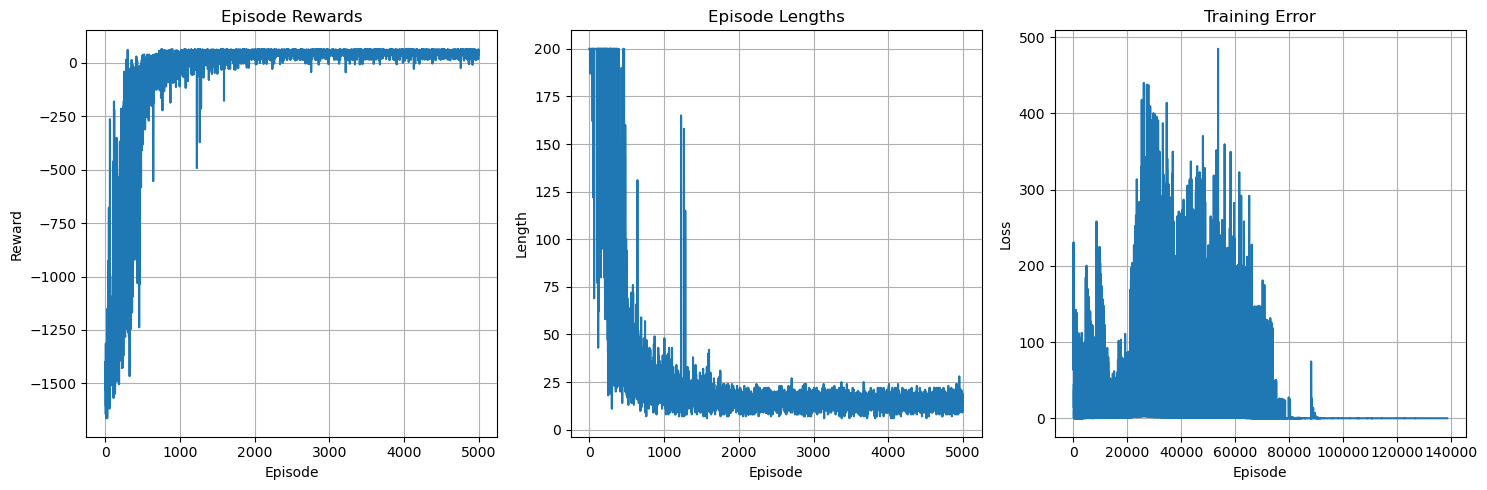

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random
from collections import deque
from tqdm import tqdm

class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states, dtype=np.float32), np.array(actions), \
               np.array(rewards, dtype=np.float32), np.array(next_states, dtype=np.float32), np.array(dones, dtype=np.float32)
    
    def size(self):
        return len(self.buffer)


class QNet(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNet, self).__init__()
        self.fc1 = nn.Linear(state_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, action_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x


class DQN:
    def __init__(self, state_dim, action_dim, device, gamma=0.99, lr=1e-3, tau=0.005):
        self.device = device
        self.action_dim = action_dim
        self.gamma = gamma
        self.tau = tau
        
        self.q_net = QNet(state_dim, action_dim).to(device)
        self.target_q_net = QNet(state_dim, action_dim).to(device)
        self.target_q_net.load_state_dict(self.q_net.state_dict())
        
        self.optimizer = optim.Adam(self.q_net.parameters(), lr=lr)
        
    def take_action(self, state, epsilon):
        if np.random.rand() < epsilon:
            return np.random.randint(self.action_dim)  # Explore
        else:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(self.device)
            with torch.no_grad():
                q_values = self.q_net(state_tensor)
            return q_values.argmax(dim=1).item()  # Exploit
    
    def update(self, replay_buffer, batch_size):
        states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)
        
        states = torch.tensor(states, dtype=torch.float32).to(self.device)
        actions = torch.tensor(actions, dtype=torch.int64).to(self.device)
        rewards = torch.tensor(rewards, dtype=torch.float32).to(self.device)
        next_states = torch.tensor(next_states, dtype=torch.float32).to(self.device)
        dones = torch.tensor(dones, dtype=torch.float32).to(self.device)
        
        q_values = self.q_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        with torch.no_grad():
            next_q_values = self.target_q_net(next_states).max(dim=1)[0]
        
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        loss = nn.MSELoss()(q_values, target_q_values)
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        return loss.item()
    
    def soft_update(self):
        for target_param, param in zip(self.target_q_net.parameters(), self.q_net.parameters()):
            target_param.data.copy_(self.tau * param.data + (1.0 - self.tau) * target_param.data)


# One-hot
def one_hot(state, state_dim):
    vec = np.zeros(state_dim, dtype=np.float32)
    vec[state] = 1.0
    return vec


# Optimized reward function
def compute_modified_reward(state, action, reward, done, info):

    modified_reward = reward
    
    # 错误接客
    if action == 4 and reward == -10: 
        modified_reward -= 10  # 额外惩罚

    # 错误下客
    if action == 5 and reward == -10: 
        modified_reward -= 10  

    # 提前结束任务但没完成
    if done and reward == -10:
        modified_reward -= 50 

    # 完成任务
    if done and reward == 20: 
        modified_reward += 50  # 奖励
    
    return modified_reward



env_name = "Taxi-v3"
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
env = gym.make(env_name)

obs_space = env.observation_space.n
action_space = env.action_space.n

# parameters
total_episodes = 5000
episodes_per_iteration = 100
iterations = total_episodes // episodes_per_iteration

batch_size = 64
buffer_size = 20000
min_buffer_size = 5000
epsilon_start = 1.0
epsilon_end = 0.1
epsilon_decay = 0.999  
update_freq = 1

replay_buffer = ReplayBuffer(buffer_size)
agent = DQN(obs_space, action_space, device, gamma=0.99, lr=0.0001, tau=0.005)

return_list = []
length_list = []
loss_list = []

epsilon = epsilon_start
total_steps = 0

# tqdm
for i_iter in range(iterations):
    with tqdm(range(episodes_per_iteration), desc=f"Iteration {i_iter}", ncols=100) as pbar:
        for i_episode_in_iter in pbar:
            i_episode = i_iter * episodes_per_iteration + i_episode_in_iter
            state, _ = env.reset(seed=i_episode)
            state_vec = one_hot(state, obs_space)
            done = False
            episode_reward = 0
            episode_length = 0
            
            while not done:
                total_steps += 1
                episode_length += 1
                action = agent.take_action(state_vec, epsilon)
                next_state, reward, terminated, truncated, info = env.step(action)
                done = terminated or truncated
                next_state_vec = one_hot(next_state, obs_space)

                reward = compute_modified_reward(state, action, reward, done, info)
                
                replay_buffer.add(state_vec, action, reward, next_state_vec, done)
                state_vec = next_state_vec
                episode_reward += reward
                
                if replay_buffer.size() > min_buffer_size and total_steps % update_freq == 0:
                    loss = agent.update(replay_buffer, batch_size)
                    agent.soft_update()
                    loss_list.append(loss)
            
            epsilon = max(epsilon_end, epsilon * epsilon_decay)
            return_list.append(episode_reward)
            length_list.append(episode_length)
    
    avg_return = np.mean(return_list[-episodes_per_iteration:])
    print(f"Episode: {(i_iter+1)*episodes_per_iteration}, Average Return: {avg_return:.2f}")

torch.save(agent.q_net.state_dict(), "dqn_taxi_v3.pth")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# rewards
axes[0].plot(return_list)
axes[0].set_title("Episode Rewards")
axes[0].set_xlabel("Episode")
axes[0].set_ylabel("Reward")
axes[0].grid(True)

# lengths
axes[1].plot(length_list)
axes[1].set_title("Episode Lengths")
axes[1].set_xlabel("Episode")
axes[1].set_ylabel("Length")
axes[1].grid(True)

# Training Error
axes[2].plot(loss_list)
axes[2].set_title("Training Error")
axes[2].set_xlabel("Episode")
axes[2].set_ylabel("Loss")
axes[2].grid(True)

plt.tight_layout()
plt.show()
